## Imports 

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.cm as cm
from easygui import *

## Select File

In [2]:
path = fileopenbox()
img = cv.imread(path)

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

## Warp Perspective

In [2]:
# Corner: 248 110
# Corner: 0 210
# Corner: 227 608
# Corner: 483 410

# Corner: 1713 753
# Corner: 0 1451
# Corner: 1586 4271
# Corner: 3384 2863

# Some hard coded points for the document.jpg image
# Only these points only work for that image
# Do NOT include in slave/master branch

# points = [[1713,753],[0,1451],[1586,4271],[3384,2863]]
points = [[1713,753],[0,1451],[2863,3384],[3384,2863]]

In [3]:
def sortPoints(points):
    sorted_pts = np.zeros((4, 2), dtype="float32")

    s = np.sum(points, axis=1)
    diff = np.diff(points, axis=1)
    unique = np.unique(s)
    
    # Checks if there are duplicate sums
    if not len(unique) == len(s):
        largest = points[0]
        smallest = points[0]
        
        for i in range(1,len(points)):
            print("Checking if",np.sum(points[i]),"is the same as",np.sum(largest))
            if np.sum(points[i]) == np.sum(largest):
                # If there are two largest sums that are the same
                # the point with the highest x value id chosen as the 3rd point
                # The other is chosen as the last point
                if points[i][0] > largest[0]:
                    sorted_pts[2] = points[i]
                    sorted_pts[3] = largest
                else:
                    sorted_pts[2] = largest
                    sorted_pts[3] = points[i]
                    
            print("Checking if",np.sum(points[i]),"is greater than",np.sum(smallest))
            if np.sum(points[i]) > np.sum(largest):
                print(True)
                largest = points[i]
                 
            print("Checking if",np.sum(points[i]),"is the same as",np.sum(smallest))
            if np.sum(points[i]) == np.sum(smallest):
                # If there are two smallest sums that are the same
                # the point with the smallest x value id chosen as the 1st point
                # The other is chosen as the 2nd point
                if points[i][0] < smallest[0]:
                    sorted_pts[0] = points[i]
                    sorted_pts[1] = smallest
                else:
                    sorted_pts[0] = smallest
                    sorted_pts[1] = points[i]
                    
            print("Checking if",np.sum(points[i]),"is less than",np.sum(smallest)) 
            if np.sum(points[i]) < np.sum(smallest):
                print(True)
                smallest = points[i]
    else:
        sorted_pts[0] = points[np.argmin(s)]
        sorted_pts[2] = points[np.argmax(s)]

        sorted_pts[1] = points[np.argmin(diff)]
        sorted_pts[3] = points[np.argmax(diff)]
        
    # Fills in the unassigned values of the sorted points
    if 0 in sorted_pts:
        result = np.where(sorted_pts == 0)
        print(np.unique(result[0]))
        for index in np.unique(result[0]):
            if index == 0:
                sorted_pts[0] = points[np.argmin(s)]
            elif index == 1:
                sorted_pts[1] = points[np.argmin(diff)]
            elif index == 2:
                sorted_pts[2] = points[np.argmax(s)]
            elif index == 3:
                sorted_pts[3] = points[np.argmax(diff)]

    return sorted_pts

In [4]:
sortPoints(points)

Checking if 1451 is the same as 2466
Checking if 1451 is greater than 2466
Checking if 1451 is the same as 2466
Checking if 1451 is less than 2466
True
Checking if 6247 is the same as 2466
Checking if 6247 is greater than 1451
True
Checking if 6247 is the same as 1451
Checking if 6247 is less than 1451
Checking if 6247 is the same as 6247
True
Checking if 6247 is greater than 1451
Checking if 6247 is the same as 1451
Checking if 6247 is less than 1451
[0 1]


array([[   0., 1451.],
       [1713.,  753.],
       [3384., 2863.],
       [2863., 3384.]], dtype=float32)

In [6]:
def warpPerspective(img,pts):
    #Calculate transformation matrix
    
    height, width = img.shape[:2]
    
    #Points on the document corners
    pts1 = np.float32(pts)
    
    #Points of the warped image 
    pts2 = np.float32([[0, 0], [width, 0], [width, height], [0, height]])
    
    #Transform image

    transformation_matrix = cv.getPerspectiveTransform(pts1, pts2)

    warped = cv.warpPerspective(img, transformation_matrix, (width, height))
    
    return warped

In [7]:
sorted_pts = sortPoints(pts)
warped = warpPerspective(gray,sorted_pts)

[0]


## Display result

<function matplotlib.pyplot.show(close=None, block=None)>

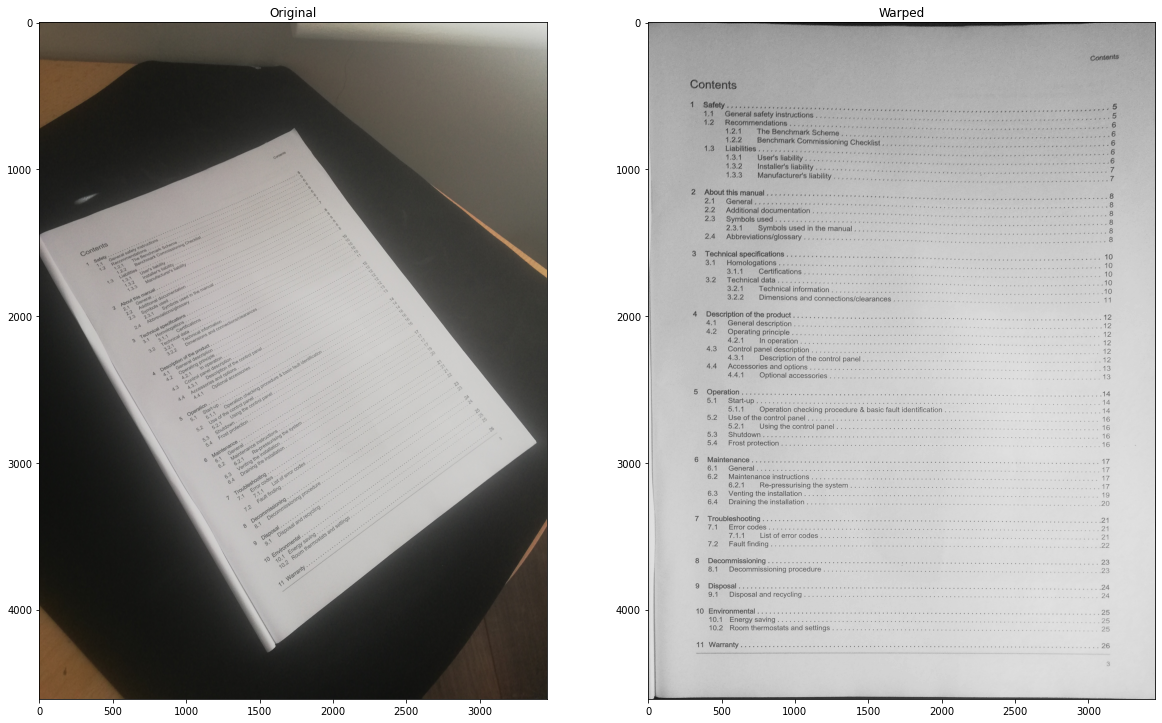

In [8]:
fig, ax = plt.subplots(ncols = 2, nrows = 1,figsize=(20,20))

ax[0].imshow(img)
ax[0].set_title('Original')

ax[1].imshow(warped,cmap=cm.gray)
ax[1].set_title('Warped')

plt.show